___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 6<br><br>Image Classification with CNN<br><br>CIFAR-10 Data<br><h1>

# Dataset Info

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.

Here are the classes in the dataset, as well as 10 random images from each:

![3Dto2D](https://storage.googleapis.com/kaggle-competitions/kaggle/3649/media/cifar-10.png)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [3]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

# Recognizing and Understanding Data

In [4]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [5]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  50000 images in the training dataset
There are  10000 images in the test dataset


In [6]:
# Checking the shape of one image
X_train[5].shape

(32, 32, 3)

In [7]:
X_train[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

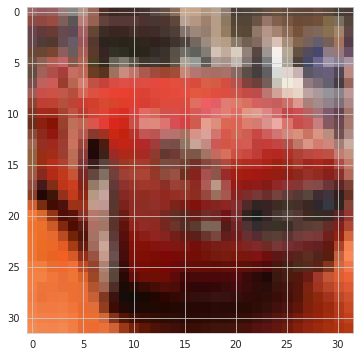

In [8]:
plt.imshow(X_train[5])
# plt.matshow(X_train[5])

In [9]:
y_train[5]

array([1], dtype=uint8)

In [10]:
y_train.shape

(50000, 1)

In [11]:
y_train        # classlara numara vermiş

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
np.unique(y_train, return_counts=True)               # 10 classdan 5000'er tane varmış

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

In [21]:
# pd.Series(y_train.flatten()).value_counts()

**Class names:**

- 0: Airplane
- 1: Automobile
- 2: Bird
- 3: Cat
- 4: Deer
- 5: Dog
- 6: Frog
- 7: Horse
- 8: Ship
- 9: Truck

In [14]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [15]:
y_train[0]

array([6], dtype=uint8)

In [16]:
y_train[0][0]

6

In [17]:
int(y_train[0])

6

In [22]:
classes[y_train[0][0]]

'frog'

In [23]:
classes[int(y_train[0])]

'frog'

In [ ]:
#int(np.random.randint(low=0, high=50000, size=1))

In [ ]:
#X_train[int(np.random.randint(low=0, high=50000, size=1))]

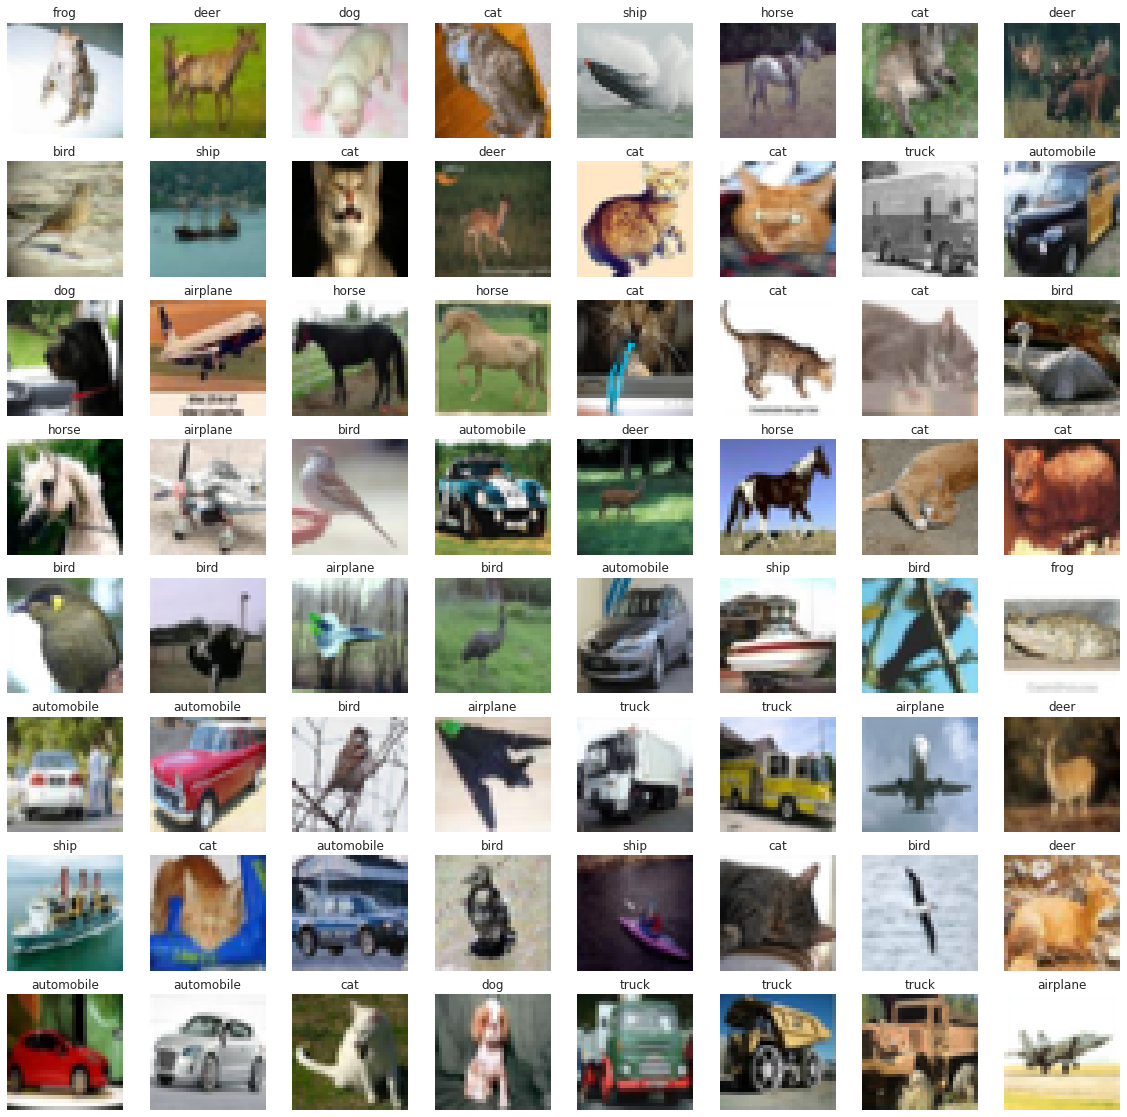

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

[30318 15066 47270 32280 40365 28225 30343 23275 11058]


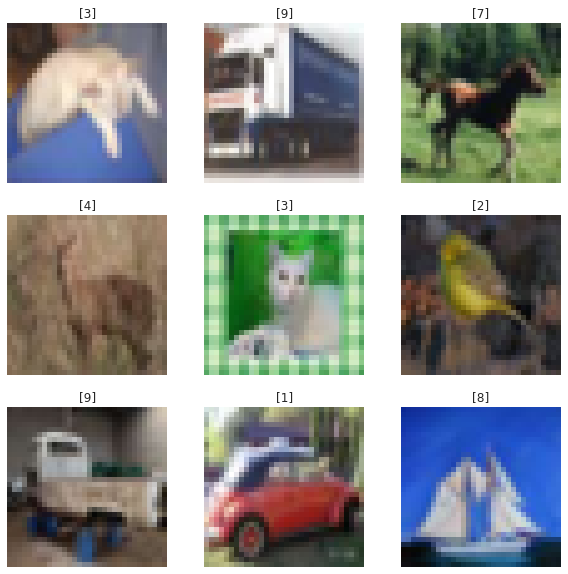

In [25]:
ix = np.random.choice(np.arange(X_train.shape[0]),9)
print(ix)
plt.figure(figsize = (10,10))
c = 1
for i in ix:
  ax = plt.subplot(3,3,c)
  plt.imshow(X_train[i],"gray")
  plt.title(y_train[i])
  c += 1
  plt.axis("off")

# Data Preprocessing

In [26]:
X_train[5].min()

0

In [33]:
X_train[5].max()          # gidip 252'ye bölersek hata yaparız.

0.9882353

In [28]:
X_test1 = X_test.copy()

In [29]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [34]:
X_train[5].min()

0.0

In [35]:
X_train[5].max()

0.9882353

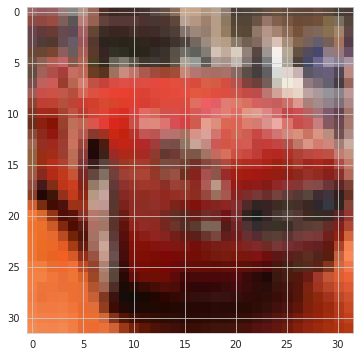

In [36]:
plt.imshow(X_train[5])

In [37]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [38]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [39]:
from tensorflow.keras.utils import to_categorical     #yine burada da to_categorical yapmayabiliriz sparse...

In [40]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [41]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# Modelling-1

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [43]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

In [46]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [47]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 78s 49ms/step - loss: 1.4082 - accuracy: 0.4910 - val_loss: 1.1504 - val_accuracy: 0.5915
Epoch 2/50
1563/1563 [==============================] - 76s 49ms/step - loss: 1.0373 - accuracy: 0.6330 - val_loss: 1.0118 - val_accuracy: 0.6457
Epoch 3/50
1563/1563 [==============================] - 76s 49ms/step - loss: 0.9112 - accuracy: 0.6806 - val_loss: 0.9477 - val_accuracy: 0.6697
Epoch 4/50
1563/1563 [==============================] - 77s 49ms/step - loss: 0.8138 - accuracy: 0.7157 - val_loss: 0.9382 - val_accuracy: 0.6700
Epoch 5/50
1563/1563 [==============================] - 78s 50ms/step - loss: 0.7380 - accuracy: 0.7405 - val_loss: 0.9237 - val_accuracy: 0.6842
Epoch 6/50
1563/1563 [==============================] - 78s 50ms/step - loss: 0.6717 - accuracy: 0.7606 - val_loss: 0.8800 - val_accuracy: 0.7044
Epoch 7/50
1563/1563 [==============================] - 79s 50ms/step - loss: 0.6122 - accuracy: 0.7840 - val_loss: 0.8850 -

In [48]:
model.metrics_names

['loss', 'accuracy']

In [49]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.408,0.491,1.150,0.591
1,1.037,0.633,1.012,0.646
2,0.911,0.681,0.948,0.670
3,0.814,0.716,0.938,0.670
4,0.738,0.740,0.924,0.684


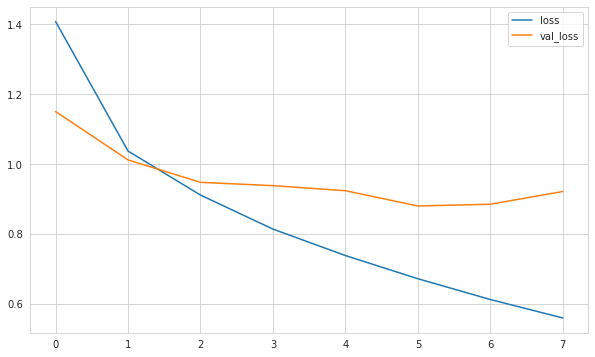

In [50]:
summary[["loss", "val_loss"]].plot();

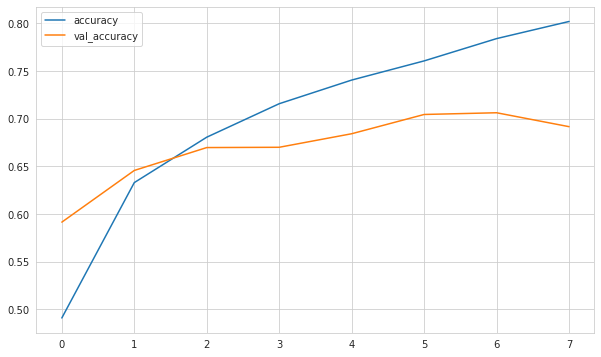

In [51]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

In [53]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.8800 - accuracy: 0.7044


[0.8799622058868408, 0.7044000029563904]

In [54]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8799622058868408
Test accuracy: 0.7044000029563904


In [56]:
pred_prob = model.predict(X_test)
pred_prob

array([[1.0565908e-04, 7.7847370e-05, 1.0963585e-03, ..., 1.1283131e-03,
        2.4618576e-03, 1.6478921e-04],
       [1.5688505e-03, 5.0967258e-01, 6.4753053e-06, ..., 2.2410443e-07,
        4.8831791e-01, 4.0673680e-04],
       [5.3440988e-02, 1.1301232e-02, 2.2010761e-03, ..., 1.0256591e-03,
        9.2399877e-01, 3.3002386e-03],
       ...,
       [6.1866405e-05, 3.9865272e-06, 2.6101770e-02, ..., 3.6840022e-02,
        2.1694184e-04, 1.8858580e-05],
       [9.3389049e-02, 4.4557440e-01, 7.2139939e-03, ..., 8.0358768e-03,
        1.0478197e-02, 3.2176173e-03],
       [1.8350142e-06, 1.2388362e-07, 1.3551675e-04, ..., 9.9778771e-01,
        4.3898588e-08, 1.1332181e-06]], dtype=float32)

In [57]:
y_pred = np.argmax(pred_prob, axis=1)

In [58]:
y_pred

array([3, 1, 8, ..., 5, 1, 7])

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.79      0.75      1000
           1       0.84      0.79      0.81      1000
           2       0.67      0.53      0.59      1000
           3       0.47      0.54      0.50      1000
           4       0.66      0.63      0.65      1000
           5       0.62      0.61      0.61      1000
           6       0.78      0.75      0.76      1000
           7       0.81      0.75      0.78      1000
           8       0.75      0.86      0.80      1000
           9       0.77      0.80      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



In [60]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [61]:
print(confusion_matrix(y_test, y_pred))

[[793  13  23  19   8   3   9  10  82  40]
 [ 19 785   8   8   0   4   5   6  56 109]
 [ 99   8 527  78  95  82  59  27  13  12]
 [ 34  14  61 541  60 158  56  33  24  19]
 [ 42   5  50  94 633  43  57  55  17   4]
 [ 24   5  30 215  43 611  18  29  13  12]
 [ 10   6  40  99  49  25 749   4  13   5]
 [ 16   5  28  61  62  50   6 747   8  17]
 [ 59  23   8   9   7   6   3   2 862  21]
 [ 30  70   6  20   4   5   4  11  54 796]]


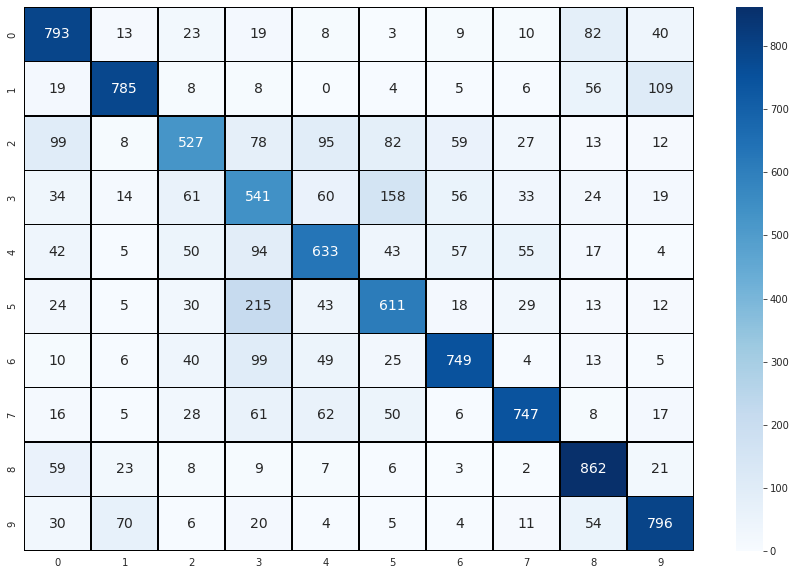

In [62]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

# Modelling-2

In [79]:
model= Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3), padding='same'))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
    
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
        
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [80]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.3907 - accuracy: 0.4965 - val_loss: 1.0744 - val_accuracy: 0.6177
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0004 - accuracy: 0.6470 - val_loss: 0.9217 - val_accuracy: 0.6790
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8646 - accuracy: 0.6956 - val_loss: 0.8466 - val_accuracy: 0.7113
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7784 - accuracy: 0.7264 - val_loss: 0.8055 - val_accuracy: 0.7202
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7263 - accuracy: 0.7452 - val_loss: 0.7365 - val_accuracy: 0.7492
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6794 - accuracy: 0.7601 - val_loss: 0.7126 - val_accuracy: 0.7556
Epoch 7/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6356 - accuracy: 0.7752 - val_loss: 0.7438 - val_accu

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.391,0.496,1.074,0.618
1,1.000,0.647,0.922,0.679
2,0.865,0.696,0.847,0.711
3,0.778,0.726,0.806,0.720
4,0.726,0.745,0.737,0.749


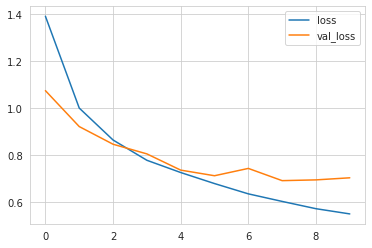

In [ ]:
summary[["loss", "val_loss"]].plot();

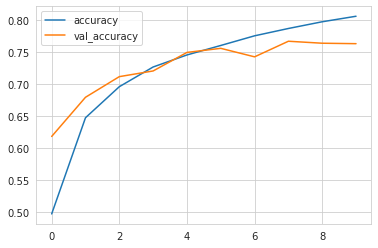

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6918 - accuracy: 0.7667


[0.6917628645896912, 0.766700029373169]

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6917628645896912
Test accuracy: 0.766700029373169


In [ ]:
pred_prob = model.predict(X_test)

In [ ]:
y_pred = np.argmax(pred_prob, axis=1)

In [ ]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1000
           1       0.90      0.88      0.89      1000
           2       0.81      0.52      0.63      1000
           3       0.53      0.65      0.58      1000
           4       0.71      0.74      0.73      1000
           5       0.64      0.69      0.67      1000
           6       0.80      0.84      0.82      1000
           7       0.83      0.82      0.83      1000
           8       0.87      0.89      0.88      1000
           9       0.85      0.83      0.84      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000



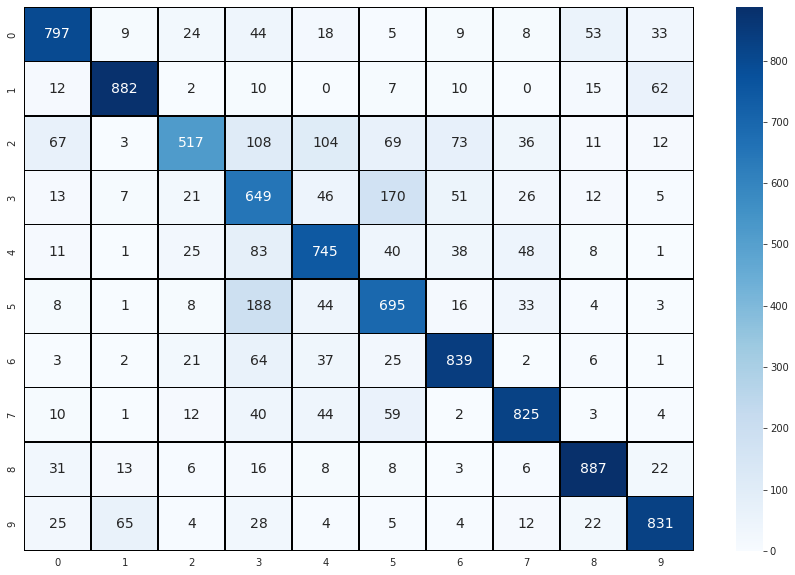

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

In [ ]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

# Modelling-3

In [ ]:
from tensorflow.keras.layers import BatchNormalization

**BatchNormalization**

- Layer that normalizes its inputs.
- Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.
    - Technique for training very deep neural networks.
    - Standardizes the inputs to a layer for each mini-batch.
    - Stabilizes the learning process,
    - Reduces the number of training epochs.
![BN1.PNG](https://miro.medium.com/max/709/0*2qZOVh96GZ-a_XdS.png)
![BN2.PNG](https://cesarlaurent.files.wordpress.com/2015/04/bn.png)
![BN3.PNG](https://3.bp.blogspot.com/-ogeLSVo_Tek/WNPS4Glmd4I/AAAAAAAAKBo/bfp-KUSsFmQGolE0uNEeWFzDXA8IPU75wCLcB/s1600/Screenshot%2Bfrom%2B2017-03-23%2B21-50-33.png)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [ ]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test), callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 19s 10ms/step - loss: 1.9599 - accuracy: 0.3029 - val_loss: 1.7514 - val_accuracy: 0.3723
Epoch 2/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.4438 - accuracy: 0.4757 - val_loss: 1.4703 - val_accuracy: 0.5024
Epoch 3/50
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2410 - accuracy: 0.5705 - val_loss: 1.1028 - val_accuracy: 0.6132
Epoch 4/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1086 - accuracy: 0.6208 - val_loss: 0.8659 - val_accuracy: 0.6969
Epoch 5/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.0126 - accuracy: 0.6594 - val_loss: 0.9495 - val_accuracy: 0.6815
Epoch 6/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.9433 - accuracy: 0.6869 - val_loss: 0.7189 - val_accuracy: 0.7554
Epoch 7/50
1563/1563 [==============================] - 15s 9ms/step - loss: 0.8771 - accuracy: 0.7107 - val_loss: 0.7643 - 

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,1.960,0.303,1.751,0.372
1,1.444,0.476,1.470,0.502
2,1.241,0.571,1.103,0.613
3,1.109,0.621,0.866,0.697
4,1.013,0.659,0.949,0.682


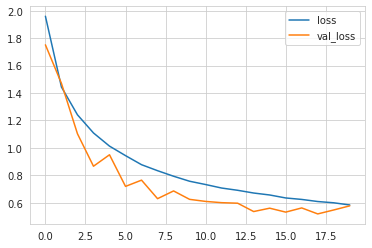

In [ ]:
summary[["loss", "val_loss"]].plot();

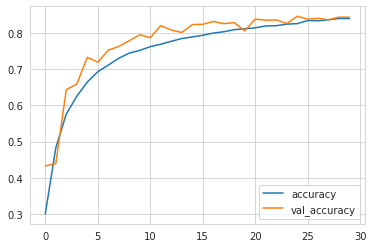

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.5180 - accuracy: 0.8312


[0.5180478096008301, 0.8312000036239624]

In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5180478096008301
Test accuracy: 0.8312000036239624


In [ ]:
pred_prob = model.predict(X_test)

In [ ]:
y_pred = np.argmax(pred_prob, axis=1)

In [ ]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       0.93      0.94      0.93      1000
           2       0.78      0.73      0.76      1000
           3       0.71      0.63      0.67      1000
           4       0.79      0.85      0.82      1000
           5       0.81      0.69      0.75      1000
           6       0.78      0.93      0.85      1000
           7       0.92      0.83      0.87      1000
           8       0.87      0.94      0.90      1000
           9       0.90      0.90      0.90      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



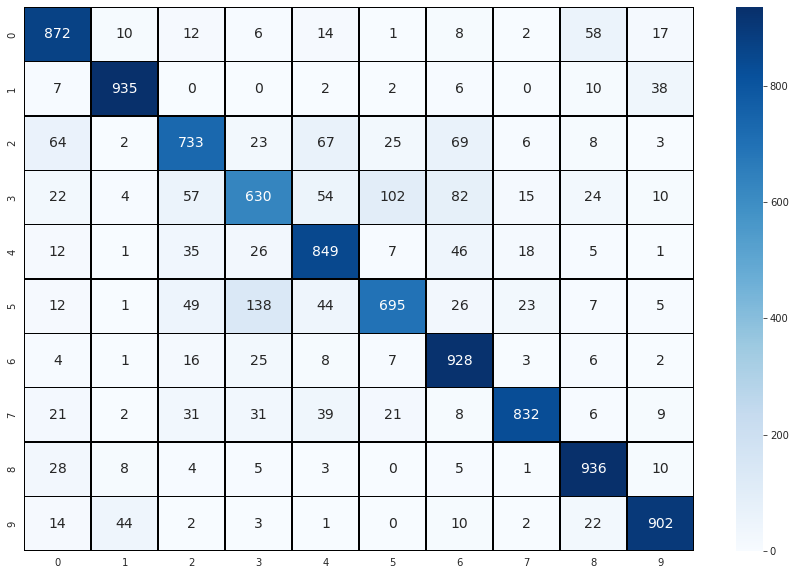

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 14})

# Prediction

In [ ]:
my_image = X_test[44]

In [ ]:
my_image.shape

(32, 32, 3)

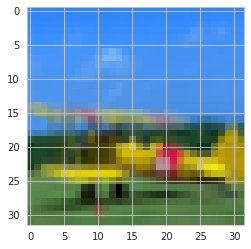

In [ ]:
plt.imshow(my_image)

In [ ]:
image_prediction = model.predict(my_image.reshape(1,32,32,3))           # kaç resim tahmin edileceğini istiyor model.

In [ ]:
image_prediction

array([[9.9804533e-01, 1.4536297e-04, 7.2303257e-04, 5.1285089e-05,
        1.9527755e-04, 1.2210948e-05, 1.5297494e-05, 2.8412458e-05,
        6.3244312e-04, 1.5138267e-04]], dtype=float32)

In [ ]:
np.argmax(image_prediction, axis=1)

array([0])

In [ ]:
result=np.argmax(image_prediction, axis=1)

In [ ]:
result

array([0])

In [ ]:
classes[int(result)]

'airplane'

In [ ]:
#model.save("cnn-1.h5")

## using

In [ ]:
model=tf.keras.models.load_model('cnn-1.h5')

In [ ]:
X_test[24].shape

In [ ]:
np.expand_dims(X_test[24],axis=0).shape               # expand dim= 1 boyut daha ekliyorum reshape de yapabiliriz.

In [ ]:
pred=model.predict(np.expand_dims(X_test[24],axis=0))               # YENİ BİR PREDİCT:BİZ EN YUKARIDA XTESTLERİ DE SCALE ETTİK AMA SCALE EDİLMEMİŞ BİR RESİM GELİRSE EĞER
                                                                    # SCALE ETMEYİ UNUTMAYALIM MUTLAKA ÇÜNKÜ MODELİ ÖYLE EĞİTTİK

In [ ]:
np.argmax(pred)

In [ ]:
plt.imshow(X_test[24].reshape(28,28))

In [ ]:
classes[24]